In [252]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(H):
    return np.exp(H)/np.sum(np.exp(H),axis=1,keepdims=1)

In [345]:
class ClassifierNeuralNetwork3():
    def __init__(self,InputColumns,OutputColumns,Layer1Nodes,Layer2Nodes):
        self.Costs=[]
        self.weights0=np.random.randn(InputColumns,Layer1Nodes)
        self.bias0=np.random.randn(1,Layer1Nodes)
        self.mu0=np.zeros((1,Layer1Nodes))
        self.sigma0=np.ones((1,Layer1Nodes))
        self.gamma0=np.ones((1,Layer1Nodes))
        self.beta0=np.zeros((1,Layer1Nodes))
        self.weights1=np.random.randn(Layer1Nodes,Layer2Nodes)
        self.bias1=np.random.randn(1,Layer2Nodes)
        self.mu1=np.zeros((1,Layer2Nodes))
        self.sigma1 = np.ones((1,Layer2Nodes))
        self.gamma1=np.ones((1,Layer2Nodes))
        self.beta1=np.zeros((1,Layer2Nodes))
        self.weights2=np.random.randn(Layer2Nodes,OutputColumns)
        self.mu2=np.zeros((1,OutputColumns))
        self.sigma2=np.ones((1,OutputColumns))
        self.bias2=np.random.randn(1,OutputColumns)
        self.gamma2 = np.ones((1,OutputColumns))
        self.beta2 = np.zeros((1,OutputColumns))
    
    def forward(self,Input,alpha=0.1):
        self.H0 = Input@self.weights0 + self.bias0
        self.mu0=alpha*(np.mean(self.H0,axis=0,keepdims=1))+(1-alpha)*self.mu0
        self.sigma0=alpha*(np.var(self.H0,axis=0,keepdims=1))+(1-alpha)*self.sigma0
        self.Hbar0 = (self.gamma0*((self.H0-self.mu0)/
                                   np.sqrt(self.sigma0+1e-10))+
                      self.beta0)
        self.Z0 = np.tanh(self.Hbar0)
        self.H1 = self.Z0@self.weights1 + self.bias1
        
        self.mu1=alpha*(np.mean(self.H1,axis=0,keepdims=1))+(1-alpha)*self.mu1
        self.sigma1=alpha*(np.var(self.H1,axis=0,keepdims=1))+(1-alpha)*self.sigma1
        self.Hbar1 = (self.gamma1*((self.H1-self.mu1)/
                                   np.sqrt(self.sigma1+1e-10))+
                      self.beta1)
        self.Z1 = np.tanh(self.Hbar1)
        self.H2 = self.Z1@self.weights2 + self.bias2
        self.mu2=alpha*(np.mean(self.H2,axis=0,keepdims=1))+(1-alpha)*self.mu2
        self.sigma2=alpha*(np.var(self.H2,axis=0,keepdims=1))+(1-alpha)*self.sigma2
        
        self.Hbar2 = (self.gamma2*((self.H2-self.mu2)/
                                   np.sqrt(self.sigma2+1e-10))+
                      self.beta2)
        self.Output = softmax(self.Hbar2)
        #return self.Output
        
    def predict(self,Input):
        self.forward(Input)
        return self.Output
    
    def backward(self,Input,Output):
        self.gradHbar2 = self.Output-Output
        self.gradgamma2 = np.sum(self.gradHbar2*((self.H2-self.mu2)/
                                                 (np.sqrt(self.sigma2+1e-10))),
                                 axis=0,
                                 keepdims=1)
        self.gradbeta2 = np.sum(self.gradHbar2,axis=0,keepdims=1)
        self.gradLogits2 = (self.gradHbar2*(self.gamma2/(np.sqrt(self.sigma2+1e-10))))
        self.gradweights2 = self.Z1.T@(self.gradLogits2)
        self.gradbias2 = np.sum(self.gradLogits2,axis=0,keepdims=1)
        
        self.gradHbar1 = self.gradLogits2@self.weights2.T
        self.gradgamma1 = np.sum(self.gradHbar1*((self.H1-self.mu1)/
                                                 (np.sqrt(self.sigma1+1e-10))),
                                 axis=0,
                                 keepdims=1)
        self.gradbeta1 = np.sum(self.gradHbar1,axis=0,keepdims=1)
        self.gradLogits1 = (self.gradHbar1*(self.gamma1/(np.sqrt(self.sigma1+1e-10))))
        self.gradweights1 = self.Z0.T@(self.gradLogits1)
        self.gradbias1 = np.sum(self.gradLogits1,axis=0,keepdims=1)
        
        self.gradHbar0 = self.gradLogits1@self.weights1.T
        self.gradgamma0 = np.sum(self.gradHbar0*((self.H0-self.mu0)/
                                                 (np.sqrt(self.sigma0+1e-10))),
                                 axis=0,
                                 keepdims=1)
        self.gradbeta0 = np.sum(self.gradHbar0,axis=0,keepdims=1)
        self.gradLogits0 = (self.gradHbar0*(self.gamma0/(np.sqrt(self.sigma0+1e-10))))
        self.gradweights0 = Input.T@(self.gradLogits0)
        self.gradbias0 = np.sum(self.gradLogits0,axis=0,keepdims=1)
        
        
    def fit(self,eta,epochs,X,Y,verbose=False,alpha=0.1):
            
        for i in range(epochs):
            self.forward(X,alpha)
            self.backward(X,Y)
            self.Costs.append(-(Y*np.log(self.Output)).sum())
            if verbose:
                print('Iteration: {}, Cost:{}'.format(i+1,self.Costs[-1]))
            self.gamma2-=eta*self.gradgamma2
            self.beta2-=eta*self.gradbeta2
            self.weights2-=eta*self.gradweights2
            self.bias2-=eta*self.gradbias2
            self.gamma1-=eta*self.gradgamma1
            self.beta1-=eta*self.gradbeta1
            self.weights1-=eta*self.gradweights1
            self.bias1-=eta*self.gradbias1
            self.gamma0-=eta*self.gradgamma0
            self.beta0-=eta*self.gradbeta0
            self.weights0-=eta*self.gradweights0
            self.bias0-=eta*self.gradbias0
        

In [403]:
N = 500
b = 5
Data = np.vstack((np.hstack((np.random.randn(N,2)+[[b,b]],[[1,0,0]]*N)),
                  np.hstack((np.random.randn(N,2)+[[-b,0]],[[0,1,0]]*N)),
                  np.hstack((np.random.randn(N,2)+[[b,-b]],[[0,0,1]]*N))))

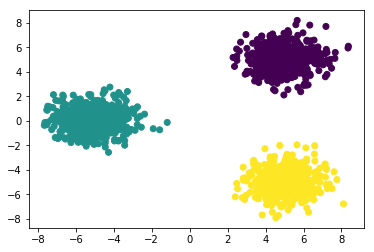

In [404]:
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(Data[:,2:],axis=1))

In [425]:
np.random.shuffle(Data)
model = ClassifierNeuralNetwork3(InputColumns=2,OutputColumns=3,Layer1Nodes=4,Layer2Nodes=4)

In [426]:
model.predict(Data[:,:2])

array([[0.40663199, 0.16376564, 0.42960238],
       [0.128349  , 0.75390723, 0.11774376],
       [0.12871292, 0.73624079, 0.13504628],
       ...,
       [0.00849808, 0.66278629, 0.32871563],
       [0.00851932, 0.6616917 , 0.32978897],
       [0.11930762, 0.74558389, 0.13510849]])

In [427]:
model.backward(Data[:,:2],Data[:,2:])

In [428]:
batch = 10
for _ in range(10000):
    Sample = Data[np.random.choice(np.arange(Data.shape[0]),size=batch,replace=0)]
    model.fit(eta=1e-3,epochs=1,X=Sample[:,:2],Y=Sample[:,2:],verbose=0)

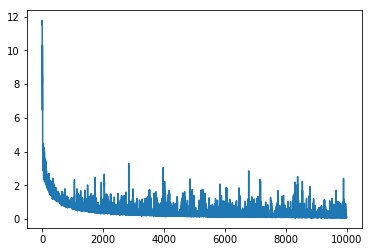

In [429]:
plt.plot(model.Costs)

In [430]:
simX = (np.random.rand(10000,2)-0.5)*(Data[:,:2].max(axis=0,keepdims=True)-Data[:,:2].min(axis=0,keepdims=True))

In [431]:
simOutput = model.predict(simX)

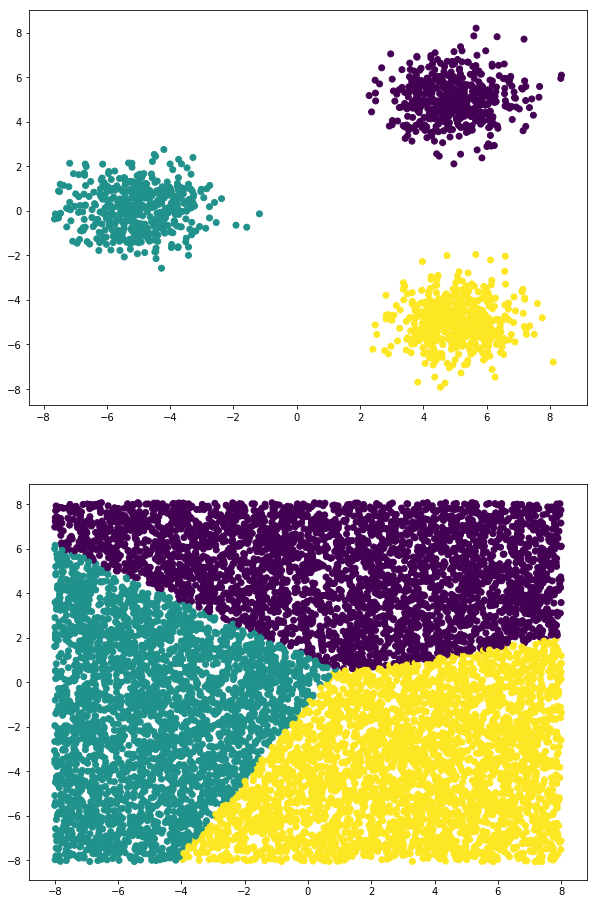

In [432]:
plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
plt.scatter(Data[:,0],Data[:,1],c=np.argmax(model.predict(Data[:,:2]),axis=1))
plt.subplot(2,1,2)
plt.scatter(simX[:,0],simX[:,1],c=np.argmax(simOutput,axis=1))

In [220]:
model.__dict__

{'weights0': array([[-203.3808956 , -177.0232386 ],
        [-301.25351752,  199.95863515]]),
 'bias0': array([[ 6.63571485, -0.28654552]]),
 'gamma0': array([[364.08871977, 268.55682905]]),
 'beta0': array([[10.51152987,  1.98518382]]),
 'weights1': array([[-12.94024797,   6.02442465],
        [  7.31549612,  14.87123719]]),
 'bias1': array([[-2.79919762, -0.16643649]]),
 'gamma1': array([[14.64765272, 15.87452586]]),
 'beta1': array([[-1.30410595, -0.32899458]]),
 'weights2': array([[ 4.54284097, -1.07505204,  1.76469517],
        [ 1.77120843,  4.97906924, -0.77216165]]),
 'bias2': array([[ 2.12293846, -0.62549818, -0.51351961]]),
 'gamma2': array([[4.78541099, 5.03643605, 0.72668787]]),
 'beta2': array([[-0.42165093, -0.22797797,  0.64962889]]),
 'H0': array([[ 1571.22404881,    -6.00838454],
        [ -471.29228561,  1223.57086658],
        [-1633.30636458,  -455.6229139 ],
        ...,
        [ 2107.33155116,   -41.15545841],
        [ 2116.46258052,   524.35385276],
        [ -